<a href="https://colab.research.google.com/github/kushalsasumana/Image-to-text-generation-project/blob/main/TrOCRDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[torch]

     |████████████████████████████████| 3.4 MB 31.2 MB/s 
     |████████████████████████████████| 596 kB 47.7 MB/s 
     |████████████████████████████████| 61 kB 498 kB/s 
     |████████████████████████████████| 895 kB 52.9 MB/s 
     |████████████████████████████████| 3.3 MB 47.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [ ]:
from PIL import Image
from IPython.display import display


In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img



In [ ]:
def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

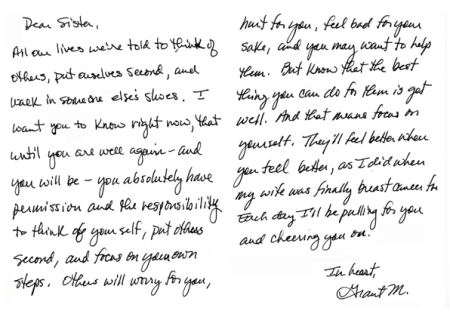

In [ ]:
hw_image = show_image('/HWLetter.png')

In [ ]:
ocr_image(hw_image)

'0 0'

In [ ]:
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)


In [ ]:
ocr_image(hw_image1)


'Dean Sister, but her you, feel bad for years,'

In [ ]:
hw_image2 = hw_image.crop((0, 40, hw_image.size[0], 60))
display(hw_image2)

In [ ]:
ocr_image(hw_image2)

'All our lives were told to thinking. Sake, and you may want to help'

In [ ]:
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

def ocr_printed_image(src_img):
  pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


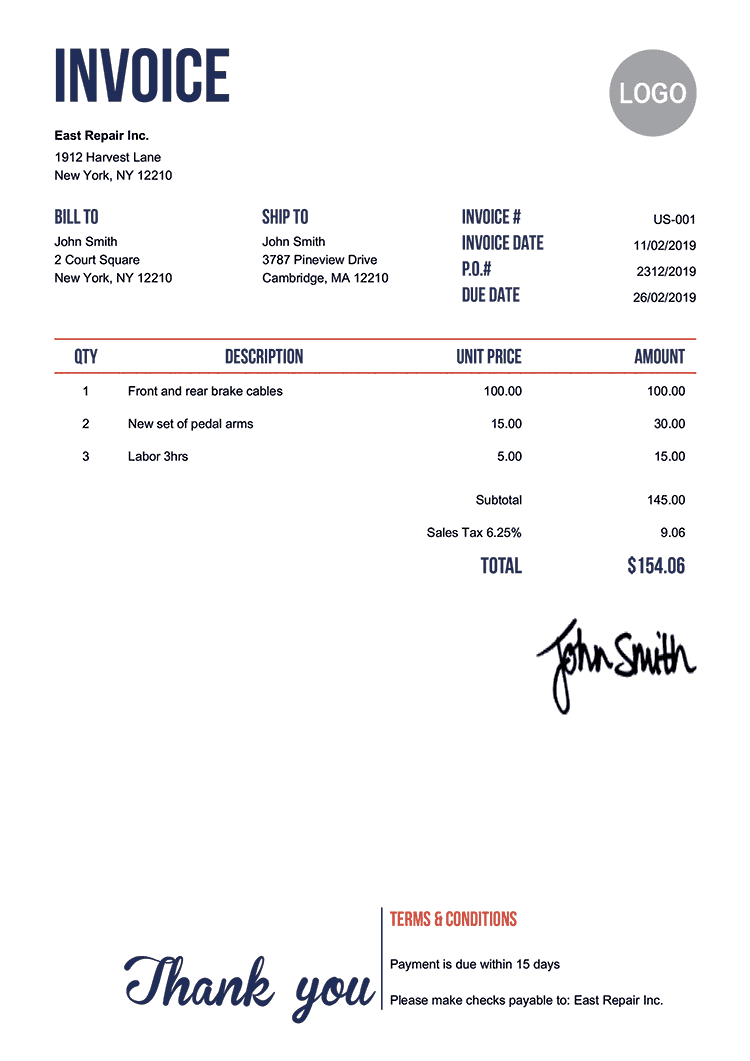

In [ ]:
invoice_image = show_image('/Invoice1.png')

In [ ]:
invoice_image1 = invoice_image.crop((0, 200, invoice_image.size[0], 225))
display(invoice_image1)

In [ ]:
ocr_printed_image(invoice_image1)

'BILL BY SHPT NOICE: USH'

In [ ]:
invoice_image2 = invoice_image.crop((0, 230, invoice_image.size[0], 250))
display(invoice_image2)

In [ ]:
ocr_printed_image(invoice_image2)

'JOH SHIM NO. JOH SHIMH INVOICE DATE 102909'